In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Load in the data

In [2]:
file_path_i = '../data/income2019.csv'
income_data = pd.read_csv(file_path_i)
income_data.head()

,Geography,Geographic Area Name,Geographic Area Name.1,State Name,State FIPS,Estimate!!Households!!Total,Margin of Error!!Households!!Total,"Estimate!!Households!!Total!!Less than $10,000","Margin of Error!!Households!!Total!!Less than $10,000","Estimate!!Households!!Total!!$10,000 to $14,999",...,Estimate!!Nonfamily households!!Median income (dollars),Margin of Error!!Nonfamily households!!Median income (dollars),Estimate!!Nonfamily households!!Mean income (dollars),Margin of Error!!Nonfamily households!!Mean income (dollars),Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Household income in the past 12 months,Margin of Error!!Nonfamily households!!PERCENT ALLOCATED!!Household income in the past 12 months,Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Family income in the past 12 months,Margin of Error!!Nonfamily households!!PERCENT ALLOCATED!!Family income in the past 12 months,Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Nonfamily households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months
0,0500000US01003,"Baldwin County, Alabama",Baldwin County,Alabama,1,82325,3231,4.9,1.6,3.9,...,37494,5940,48871,5729,(X),(X),(X),(X),30.1,(X)
1,0500000US01015,"Calhoun County, Alabama",Calhoun County,Alabama,1,44636,2010,9.6,3.1,7.3,...,26143,3350,32609,4229,(X),(X),(X),(X),35.7,(X)
2,0500000US01043,"Cullman County, Alabama",Cullman County,Alabama,1,32090,1233,4.4,1.5,5.4,...,22464,3132,28508,2622,(X),(X),(X),(X),37.1,(X)
3,0500000US01049,"DeKalb County, Alabama",DeKalb County,Alabama,1,24880,1347,7.2,2.8,8.4,...,21213,4028,36416,10258,(X),(X),(X),(X),36.0,(X)
4,0500000US01051,"Elmore County, Alabama",Elmore County,Alabama,1,30712,1330,2.9,1.4,1.9,...,34964,10694,50153,12317,(X),(X),(X),(X),39.1,(X)


Finding the existing median columns

In [3]:
median_income_columns = [col for col in income_data.columns if "median" in col.lower() and "income" in col.lower()] #trying to pull any columns that have existing calculated medians
median_income_columns

['Estimate!!Households!!Median income (dollars)',
 'Margin of Error!!Households!!Median income (dollars)',
 'Estimate!!Families!!Median income (dollars)',
 'Margin of Error!!Families!!Median income (dollars)',
 'Estimate!!Married-couple families!!Median income (dollars)',
 'Margin of Error!!Married-couple families!!Median income (dollars)',
 'Estimate!!Nonfamily households!!Median income (dollars)',
 'Margin of Error!!Nonfamily households!!Median income (dollars)']

Removing the margin of error columns

In [4]:
median_income_columns = [col for col in income_data.columns if "median" in col.lower() and "income" in col.lower() and "margin of error" not in col.lower()]
median_income_columns

['Estimate!!Households!!Median income (dollars)',
 'Estimate!!Families!!Median income (dollars)',
 'Estimate!!Married-couple families!!Median income (dollars)',
 'Estimate!!Nonfamily households!!Median income (dollars)']

In [5]:
median_income_description = income_data[median_income_columns].describe()
median_income_description

,Estimate!!Households!!Median income (dollars),Estimate!!Families!!Median income (dollars),Estimate!!Married-couple families!!Median income (dollars),Estimate!!Nonfamily households!!Median income (dollars)
count,829.000000,829.000000,829.000000,829.000000
mean,65493.220748,80869.740651,94983.915561,38596.363088
std,17198.517337,20025.100755,21490.803588,10827.281471
min,30480.000000,41162.000000,50824.000000,17539.000000
25%,53456.000000,66741.000000,80588.000000,31514.000000
50%,61577.000000,77039.000000,91075.000000,36639.000000
75%,72900.000000,90983.000000,104662.000000,43341.000000
max,151800.000000,169887.000000,191064.000000,105235.000000


In [6]:
median_income_description = median_income_description.round(2)
median_income_description

,Estimate!!Households!!Median income (dollars),Estimate!!Families!!Median income (dollars),Estimate!!Married-couple families!!Median income (dollars),Estimate!!Nonfamily households!!Median income (dollars)
count,829.00,829.00,829.00,829.00
mean,65493.22,80869.74,94983.92,38596.36
std,17198.52,20025.10,21490.80,10827.28
min,30480.00,41162.00,50824.00,17539.00
25%,53456.00,66741.00,80588.00,31514.00
50%,61577.00,77039.00,91075.00,36639.00
75%,72900.00,90983.00,104662.00,43341.00
max,151800.00,169887.00,191064.00,105235.00


Looking at distribution of income

All income

In [7]:
income_columns = [col for col in income_data.columns if "total" in col.lower() and "$" in col.lower() and "margin of error" not in col.lower()] #trying to pull all income columns
income_columns

['Estimate!!Households!!Total!!Less than $10,000',
 'Estimate!!Households!!Total!!$10,000 to $14,999',
 'Estimate!!Households!!Total!!$15,000 to $24,999',
 'Estimate!!Households!!Total!!$25,000 to $34,999',
 'Estimate!!Households!!Total!!$35,000 to $49,999',
 'Estimate!!Households!!Total!!$50,000 to $74,999',
 'Estimate!!Households!!Total!!$75,000 to $99,999',
 'Estimate!!Households!!Total!!$100,000 to $149,999',
 'Estimate!!Households!!Total!!$150,000 to $199,999',
 'Estimate!!Households!!Total!!$200,000 or more',
 'Estimate!!Families!!Total!!Less than $10,000',
 'Estimate!!Families!!Total!!$10,000 to $14,999',
 'Estimate!!Families!!Total!!$15,000 to $24,999',
 'Estimate!!Families!!Total!!$25,000 to $34,999',
 'Estimate!!Families!!Total!!$35,000 to $49,999',
 'Estimate!!Families!!Total!!$50,000 to $74,999',
 'Estimate!!Families!!Total!!$75,000 to $99,999',
 'Estimate!!Families!!Total!!$100,000 to $149,999',
 'Estimate!!Families!!Total!!$150,000 to $199,999',
 'Estimate!!Families!!Tota

Only Households

In [8]:
total_households_columns = [col for col in income_data.columns if "total" in col.lower() and "households" in col.lower() and "$" in col.lower() and "margin of error" not in col.lower() and "nonfamily" not in col.lower() ]
total_households_columns

['Estimate!!Households!!Total!!Less than $10,000',
 'Estimate!!Households!!Total!!$10,000 to $14,999',
 'Estimate!!Households!!Total!!$15,000 to $24,999',
 'Estimate!!Households!!Total!!$25,000 to $34,999',
 'Estimate!!Households!!Total!!$35,000 to $49,999',
 'Estimate!!Households!!Total!!$50,000 to $74,999',
 'Estimate!!Households!!Total!!$75,000 to $99,999',
 'Estimate!!Households!!Total!!$100,000 to $149,999',
 'Estimate!!Households!!Total!!$150,000 to $199,999',
 'Estimate!!Households!!Total!!$200,000 or more']

Only Families

In [9]:
family_columns = [col for col in income_data.columns if "total" in col.lower() and "families" in col.lower() and "$" in col.lower() and "margin of error" not in col.lower() and "married" not in col.lower()]
family_columns

['Estimate!!Families!!Total!!Less than $10,000',
 'Estimate!!Families!!Total!!$10,000 to $14,999',
 'Estimate!!Families!!Total!!$15,000 to $24,999',
 'Estimate!!Families!!Total!!$25,000 to $34,999',
 'Estimate!!Families!!Total!!$35,000 to $49,999',
 'Estimate!!Families!!Total!!$50,000 to $74,999',
 'Estimate!!Families!!Total!!$75,000 to $99,999',
 'Estimate!!Families!!Total!!$100,000 to $149,999',
 'Estimate!!Families!!Total!!$150,000 to $199,999',
 'Estimate!!Families!!Total!!$200,000 or more']

Only Married Couples

In [10]:
married_columns = [col for col in income_data.columns if "total" in col.lower() and "married" in col.lower() and "$" in col.lower() and "margin of error" not in col.lower()]
married_columns

['Estimate!!Married-couple families!!Total!!Less than $10,000',
 'Estimate!!Married-couple families!!Total!!$10,000 to $14,999',
 'Estimate!!Married-couple families!!Total!!$15,000 to $24,999',
 'Estimate!!Married-couple families!!Total!!$25,000 to $34,999',
 'Estimate!!Married-couple families!!Total!!$35,000 to $49,999',
 'Estimate!!Married-couple families!!Total!!$50,000 to $74,999',
 'Estimate!!Married-couple families!!Total!!$75,000 to $99,999',
 'Estimate!!Married-couple families!!Total!!$100,000 to $149,999',
 'Estimate!!Married-couple families!!Total!!$150,000 to $199,999',
 'Estimate!!Married-couple families!!Total!!$200,000 or more']

Non-family

In [11]:
non_family_columns = [col for col in income_data.columns if "total" in col.lower() and "non" in col.lower() and "$" in col.lower() and "margin of error" not in col.lower() and "married" not in col.lower()]
non_family_columns

['Estimate!!Nonfamily households!!Total!!Less than $10,000',
 'Estimate!!Nonfamily households!!Total!!$10,000 to $14,999',
 'Estimate!!Nonfamily households!!Total!!$15,000 to $24,999',
 'Estimate!!Nonfamily households!!Total!!$25,000 to $34,999',
 'Estimate!!Nonfamily households!!Total!!$35,000 to $49,999',
 'Estimate!!Nonfamily households!!Total!!$50,000 to $74,999',
 'Estimate!!Nonfamily households!!Total!!$75,000 to $99,999',
 'Estimate!!Nonfamily households!!Total!!$100,000 to $149,999',
 'Estimate!!Nonfamily households!!Total!!$150,000 to $199,999',
 'Estimate!!Nonfamily households!!Total!!$200,000 or more']

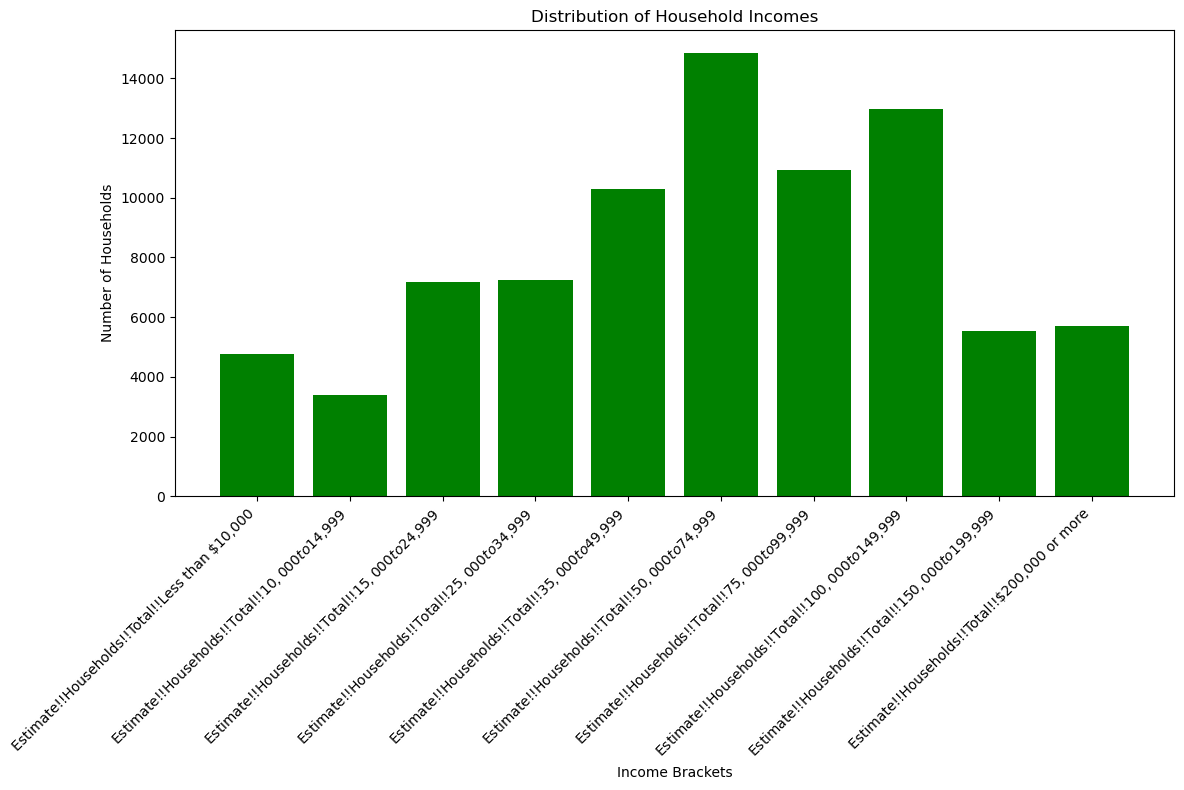

In [12]:
income_brackets = [
    'Estimate!!Households!!Total!!Less than $10,000',
    'Estimate!!Households!!Total!!$10,000 to $14,999',
    'Estimate!!Households!!Total!!$15,000 to $24,999',
    'Estimate!!Households!!Total!!$25,000 to $34,999',
    'Estimate!!Households!!Total!!$35,000 to $49,999',
    'Estimate!!Households!!Total!!$50,000 to $74,999',
    'Estimate!!Households!!Total!!$75,000 to $99,999',
    'Estimate!!Households!!Total!!$100,000 to $149,999',
    'Estimate!!Households!!Total!!$150,000 to $199,999',
    'Estimate!!Households!!Total!!$200,000 or more'
]
total_counts = income_data[income_brackets].sum()

plt.figure(figsize=(12, 8))
plt.bar(income_brackets, total_counts, color='green')

plt.xticks(rotation=45, ha="right")

plt.title('Distribution of Household Incomes')
plt.xlabel('Income Brackets')
plt.ylabel('Number of Households')
plt.tight_layout()

plt.show()

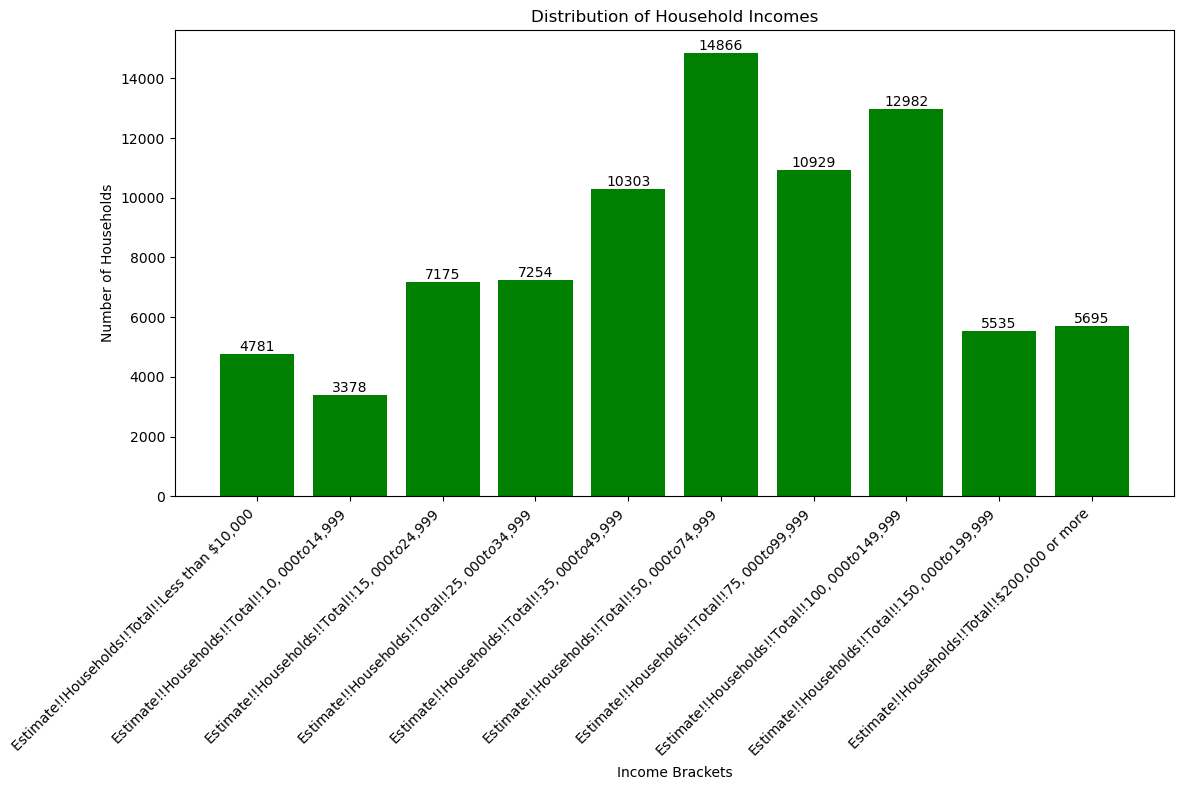

In [16]:
plt.figure(figsize=(12, 8))
bars = plt.bar(income_brackets, total_counts, color='green')

plt.xticks(rotation=45, ha="right")

plt.title('Distribution of Household Incomes')
plt.xlabel('Income Brackets')
plt.ylabel('Number of Households')

# Iterate over the bars and use the text() function to display the count above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [13]:
custom_labels = [
    'Less than $10k',
    '$10k-$14.9k',
    '$15k-$24.9k',
    '$25k-$34.9k',
    '$35k-$49.9k',
    '$50k-$74.9k',
    '$75k-$99.9k',
    '$100k-$149.9k',
    '$150k-$199.9k',
    'More than $200k'
]


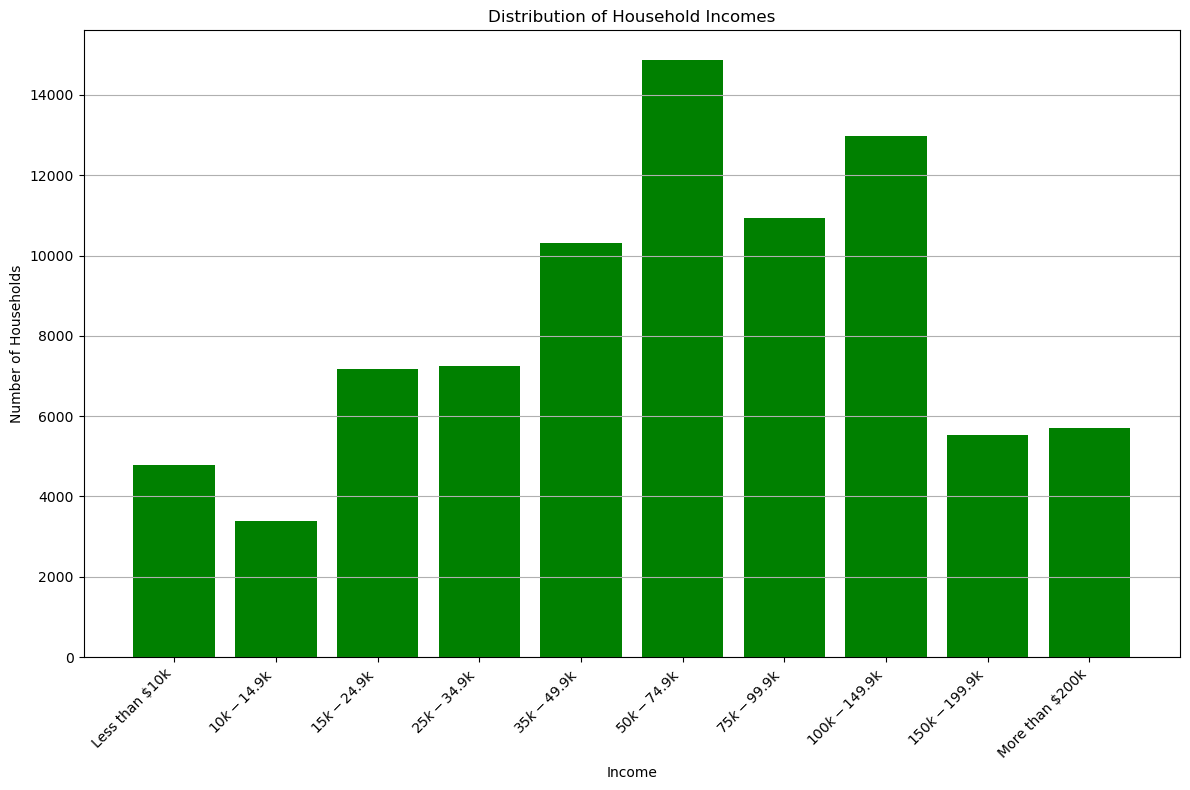

In [14]:
n_brackets = len(custom_labels)

plt.figure(figsize=(12, 8))
bars = plt.bar(range(n_brackets), total_counts, color='green')

plt.xticks(range(n_brackets), custom_labels, rotation=45, ha="right")

plt.title('Distribution of Household Incomes')
plt.xlabel('Income')
plt.ylabel('Number of Households')
plt.tight_layout()
plt.grid(axis='y')

plt.show()

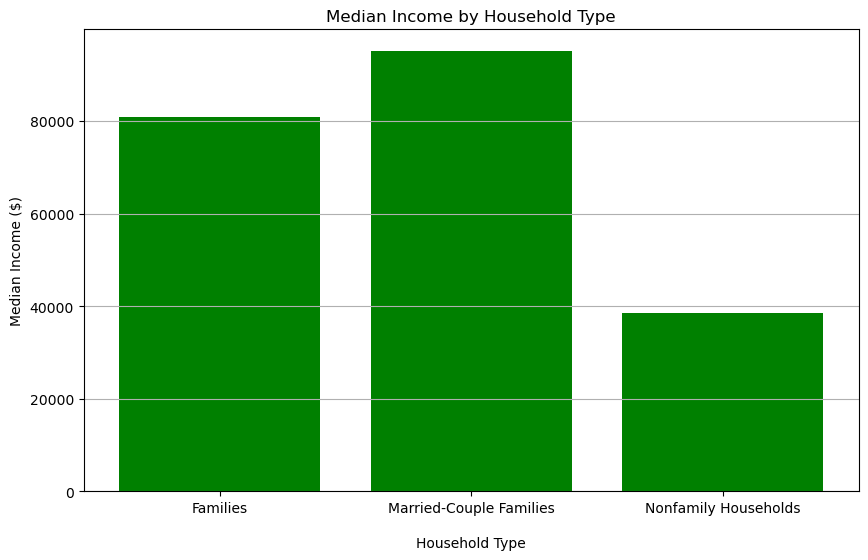

In [15]:
median_income_columns = [
    'Estimate!!Families!!Median income (dollars)',
    'Estimate!!Married-couple families!!Median income (dollars)',
    'Estimate!!Nonfamily households!!Median income (dollars)'
]

median_incomes = income_data[median_income_columns].mean()
labels = ['Families', 'Married-Couple Families', 'Nonfamily Households']

plt.figure(figsize=(10, 6))
plt.bar(labels, median_incomes, color='green')
plt.title('Median Income by Household Type')
plt.xlabel('Household Type', labelpad=15)
plt.ylabel('Median Income ($)')
plt.grid(axis='y')

plt.show()